In [1]:
import pandas as pd
import numpy as np
raw_df = pd.read_csv('C:\\Workspace\\python\\Data_Science\\04.공공데이터활용\\data\\제주 핫플레이스.csv')
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [2]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()
location_counts.to_csv('location_counts.csv')
loc_df = pd.read_csv('C:\\Workspace\\python\\Data_Science\\05.웹프로그래밍과 HTML, 크롤링\\location_counts.csv')
loc_df.columns = ['지명', '빈도']
loc_df.head()

(1027, 1)


,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


In [3]:
# 카카오 api를 이용한 장소 검색
filename = 'C:\\Workspace\\python\\Data_Science\\04.공공데이터활용\\kakaoapikey.txt'
with open(filename) as f:
    api_key = f.read()
import requests
from urllib.parse import quote
keyword = '합정 스타벅스'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
url
result = requests.get(url,
                      headers = {'Authorization': f'KakaoAK {api_key}'}).json()
result['documents'][0]

{'address_name': '서울 마포구 서교동 395-166',
 'category_group_code': 'CE7',
 'category_group_name': '카페',
 'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
 'distance': '',
 'id': '26572121',
 'phone': '1522-3232',
 'place_name': '스타벅스 서교점',
 'place_url': 'http://place.map.kakao.com/26572121',
 'road_address_name': '서울 마포구 양화로 78',
 'x': '126.916980454434',
 'y': '37.5514601750423'}

In [4]:
def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                          headers = {'Authorization': f'KakaoAK {api_key}'}).json()
    try:
        result['documents'][0]
        name = result['documents'][0]['place_name']
        lng = result['documents'][0]['x']
        lat = result['documents'][0]['y']
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan
    return name, lng, lat
find_place('제주공항')

('제주국제공항', '126.492769004244', '33.5070789578184')

In [5]:
# loc_df에 위도, 경도 정보 추가
name_list, lng_list, lat_list = [], [], []
for place in loc_df['지명']:
    name, lng, lat = find_place(place)
    if lng != 'NaN':
        name_list.append(name)
        lng_list.append(lng)
        lat_list.append(lat)

Jeju-do
Jungle Book by Alice
성산일출봉 城山日出峰  Seongsan Ilchulbong
폼포코식당_pompokokitchen
Nimome
제주고궁한복카페 jeju gogung hanbok studio
제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地
김녕미로공원 Jeju Kimnyoung Maze Park
위미2리 동백군락지
Jeju Island 제주특별자치도 济州道
한라산 (漢拏山, Hallasan)
제주 꿈꾸는고래 스쿠버&게스트하우스
牛岛 Udo Island 우도
퍼시픽랜드 - Pacific Land JEJU
Casa Linda Guesthouse-까사 린다 펜션
고집돌우럭-gozipfish
제주 성산 신산포구자연산횟집 회포장
the cliff jeju - 더클리프 제주
함덕반하다
성산일출봉 게스트하우스 파티 띵까게스트하우스
Sunnyside Beachclub Jeju
Busan, South Korea
새별오름 (Saebyul Orum)
해발1950m 한라산 백록담
아날로그감귤체험
몽상드 애월 (Mônsant)
The Shilla Jeju
Harmduck Beach in Jeju Island
Guzasien -구좌지앵
환상의 섬 Jeju Island
커피파인더coffeefinder제주시청
스윗슬로cafe
Hamdeok Jeju
Jeju horse Riding farm
Seoul, South Korea
천지연폭포 (Cheonjiyeon Waterfall)
Paris, France
애월해안가
2월22일 브런치카페
Hyatt Regency, Jeju Island
빨간모자마법사
JEJU앨리스
Namwon Seogwipo Jeju,South korea
Daegu, South Korea
붉은못허브팜 Cafe Redpond 애월본점
Ulsan, South Korea
보엠 - Bohème
윗세오름(해발 1700M)
제스토리, 바이제주, 제주감성소품
하얏트 리젠시 제주ㅣHyatt Regency Jeju
Oedolgae Jeju
Meal Table G

In [6]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,Jeju in aA,33.53833652360498,126.83650369902168
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,서귀포잠수함,33.2393033784206,126.558616052674
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.2915720831759,126.32785786016811


In [7]:
# Null 데이터 유무 확인
loc_df.isnull().sum()
loc_df.isna().sum()
# Null 데이터 삭제
df = loc_df.dropna()
df.isnull().sum().sum() # null값이 모두 삭제되었는지 확인
# 공식명칭 중복여부
df.공식명칭.value_counts()
pivot_df = df.pivot_table(index = ['공식명칭', '위도', '경도'], values = '빈도', aggfunc = 'sum')
pivot_df.head()
pivot_df.reset_index(inplace = True)
pivot_df.공식명칭.value_counts()[:5]
pivot_df.to_csv('공식명칭.csv', index = False)

<AxesSubplot:>

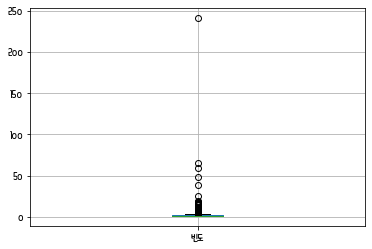

In [8]:
# folium 지도 시각화
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

df.sort_values(by='빈도', ascending = False).head(10)
df[['빈도']].boxplot()

In [9]:
import folium
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location = Mt_Hanla, zoom_start = 11)
for i in df.index:
    folium.Circle(
        radius = int(df['빈도'][i]) * 20, # int64와 str은 처리가 불가능하므로 자료형변경이 필요
        location = [df.위도[i], df.경도[i]],
        popup = folium.Popup(f'{df.공식명칭}', max_width = 500),
        tooltip = df.공식명칭[i],
        color = 'red',
        fill = True
    ).add_to(map)
map